# pass@k analysis
This notebook demonstrates how to visualize which model managed to achieve which pass@k value.

In [1]:
import pandas as pd
import os

In [2]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename)
        df = pd.read_csv(directory + filename)
        df['model'] = filename.replace("_passk_results.csv", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_claude-3-opus-20240229_passk_results.csv
samples_codellama_passk_results.csv
samples_gemini-pro_passk_results.csv
samples_gpt-3.5-turbo-1106_passk_results.csv
samples_gpt-4-1106-preview_passk_results.csv
samples_Mistral-7B-Instruct-v0.2_passk_results.csv


In [3]:
df

,Unnamed: 0,pass@1,pass@5,pass@10,model
0,0,0.395745,0.589412,0.638298,claude-3-opus-20240229
0,0,0.072340,0.215805,0.319149,codellama
0,0,0.117021,0.287994,0.382979,gemini-pro
0,0,0.282979,0.519504,0.617021,gpt-3.5-turbo-1106
0,0,0.421277,0.641000,0.702128,gpt-4-1106-preview
0,0,0.119149,0.249409,0.319149,Mistral-7B-Instruct-v0.2


In [4]:
# Drop the "Unnamed: 0" column from the dataframe
df = df.drop("Unnamed: 0", axis=1)

df

,pass@1,pass@5,pass@10,model
0,0.395745,0.589412,0.638298,claude-3-opus-20240229
0,0.072340,0.215805,0.319149,codellama
0,0.117021,0.287994,0.382979,gemini-pro
0,0.282979,0.519504,0.617021,gpt-3.5-turbo-1106
0,0.421277,0.641000,0.702128,gpt-4-1106-preview
0,0.119149,0.249409,0.319149,Mistral-7B-Instruct-v0.2


In [5]:
# Set the "model" column as the index and then transpose
df_transposed = df.set_index('model').transpose()
df_transposed['k'] = [1,5,10]
df_transposed

model,claude-3-opus-20240229,codellama,gemini-pro,gpt-3.5-turbo-1106,gpt-4-1106-preview,Mistral-7B-Instruct-v0.2,k
pass@1,0.395745,0.072340,0.117021,0.282979,0.421277,0.119149,1
pass@5,0.589412,0.215805,0.287994,0.519504,0.641000,0.249409,5
pass@10,0.638298,0.319149,0.382979,0.617021,0.702128,0.319149,10


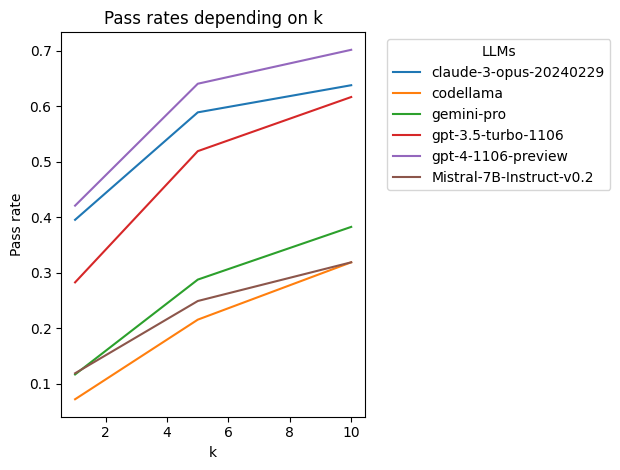

In [6]:
import matplotlib.pyplot as plt

# Assuming 'k' is an index after transposition, let's reset the index first if not already done
if 'k' not in df_transposed.columns:
    df_transposed.reset_index(inplace=True)

# Separate 'k' column for x-axis
x = df_transposed['k']

# Plot each column except 'k' against 'k'
for column in df_transposed.columns:
    if column != 'k':  # Avoid plotting 'k' against itself
        plt.plot(x, df_transposed[column], label=column)

# Adding plot decorations
plt.xlabel('k')
plt.ylabel('Pass rate')
plt.title('Pass rates depending on k')
plt.legend(title='LLMs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()